In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

## Original discontinued data 

In [58]:
t = np.linspace(-5, 5, 500)
Phi = np.hstack(
    [
        np.sin(1 * t[t < 0]), 
        np.cos(1.5 * t[t >= 0])
    ]
)

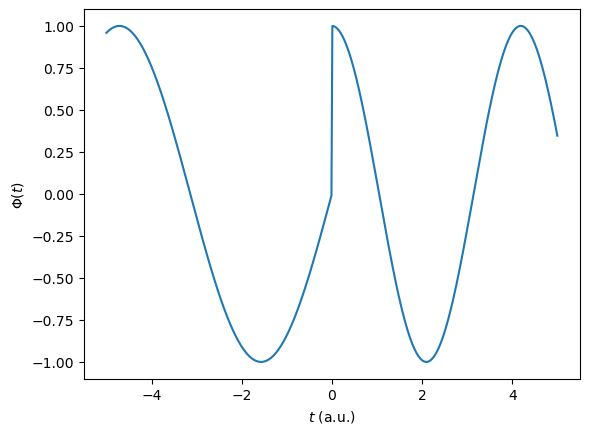

In [59]:
plt.plot(t, Phi)
plt.xlabel("$t$ (a.u.)")
plt.ylabel("$\\Phi(t)$")
plt.show()

## Smoothing the discontinuity

In [101]:
def local_smoothing(Phi, t, t_start, t_end, sigma, truncate=4):
    """
    Apply Gaussian smoothing to a specific time segment of signal Phi.
    
    Args:
        Phi: Input signal array
        t: Time array corresponding to Phi
        t_start, t_end: Time boundaries for smoothing region
        sigma: Standard deviation for Gaussian kernel
        truncate: Truncate filter at this many standard deviations
    """
    # Find indices corresponding to time boundaries
    start_idx = np.searchsorted(t, t_start, side='left')
    end_idx = np.searchsorted(t, t_end, side="right")
    
    # Calculate padding size to avoid edge effects
    cutoff = int(truncate * sigma)
    
    # Apply Gaussian filter with padding on both sides
    # Typo fixed: "smoth_segment" → "smooth_segment"
    smooth_segment = gaussian_filter1d(
        Phi[start_idx - cutoff:end_idx + cutoff], sigma, truncate=truncate
    )
    
    # Reconstruct full signal: original | smoothed | original
    Phi_smooth = np.hstack(
        [
            Phi[:start_idx],  # Keep original before smoothing region
            smooth_segment[cutoff:-cutoff] if cutoff else smooth_segment,  # Remove padding
            Phi[end_idx:]  # Keep original after smoothing region
        ]
    )
    return Phi_smooth

In [102]:
Phi_smooth = local_smoothing(Phi, t, t_start = -0.5, t_end = 0.5, sigma = 5)

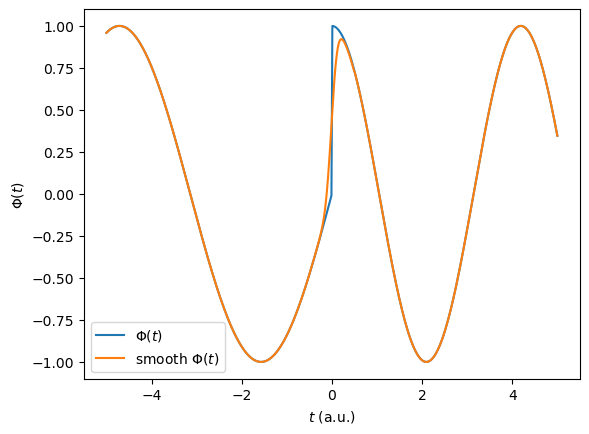

In [103]:
plt.plot(t, Phi, label="$\\Phi(t)$")
plt.plot(t, Phi_smooth, label="smooth $\\Phi(t)$")
plt.xlabel("$t$ (a.u.)")
plt.ylabel("$\\Phi(t)$")
plt.legend()
plt.show()

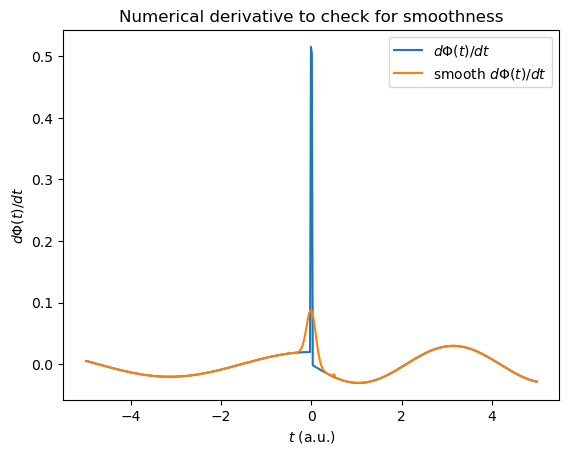

In [104]:
plt.title("Numerical derivative to check for smoothness")
plt.plot(t, np.gradient(Phi), label="$d\\Phi(t)/dt$")
plt.plot(t, np.gradient(Phi_smooth), label="smooth $d\\Phi(t)/dt$")
plt.xlabel("$t$ (a.u.)")
plt.ylabel("$d\\Phi(t)/dt$")
plt.legend()
plt.show()